In [1]:
import math
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import pandas as pd


In [4]:
data=pd.read_csv(r"C:\Users\verma\OneDrive\Desktop\Mlops_example\Bmi_male_female.csv")

In [5]:
data.head(3)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4


In [19]:
data.shape

(500, 4)

In [7]:
data_t=data.iloc[:,1:]

In [13]:
training_data=data_t.values.tolist()

In [16]:
data_train=training_data[:400]
data_test=training_data[400:]

In [29]:
data_test=data_test[0]

In [31]:
data_test

[195, 104, 3]

In [17]:
len(data_train)

400

In [18]:
len(data_test)

100

In [25]:
#data_test

### Classical Machine Learning

In [35]:
import math
import numpy as np
from qiskit import Aer, QuantumCircuit, transpile, execute

# Training data: [feature1, feature2, label]
trainingData = [[0.9798, 0.2, 1], [0.3, 0.954, 0]]
#trainingData=data_train
# Query data to classify
queryData = [0.85, 0.5268]
#queryData=[195, 104]
# Normalize training data
for i in range(len(trainingData)):
    vecLen = math.sqrt(trainingData[i][0]**2 + trainingData[i][1]**2)
    trainingData[i][0] /= vecLen
    trainingData[i][1] /= vecLen

# Normalize query data
vecLen = math.sqrt(queryData[0]**2 + queryData[1]**2)
queryData[0] /= vecLen
queryData[1] /= vecLen

# Compute Euclidean Distances Squared
euclideanDistanceSquared = [
    (queryData[0] - trainingData[0][0])**2 + (queryData[1] - trainingData[0][1])**2,
    (queryData[0] - trainingData[1][0])**2 + (queryData[1] - trainingData[1][1])**2
]

# Compute Weights
weights = [
    1 - 0.25 * euclideanDistanceSquared[0],
    1 - 0.25 * euclideanDistanceSquared[1]
]

# Normalize Weights
weightSum = sum(weights)
weights = [w / weightSum for w in weights]

# Print the classical probabilities
print("Classical Machine Learning:")
print("P(1) =", weights[0], "   P(0) =", weights[1])
print("")


Classical Machine Learning:
P(1) = 0.5244421365167681    P(0) = 0.475557863483232



### Quantum Machine Learning

Quantum Machine Learning:
P(1) = 0.5260411003588127    P(0) = 0.47395889964118737

Intermediate State Vectors:
After Hadamard Statevector([ 0.        +0.00000000e+00j,  0.64692786-3.68027968e-17j,
              0.        +0.00000000e+00j,  0.25696062-2.28090745e-17j,
              0.40657751-3.68027968e-17j,  0.        +0.00000000e+00j,
              0.5235206 -2.28090745e-17j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j,  0.04589258+3.68027968e-17j,
              0.        +0.00000000e+00j, -0.11553983+2.28090745e-17j,
             -0.19445778+3.68027968e-17j,  0.        +0.00000000e+00j,
              0.15102015+2.28090745e-17j,  0.        +0.00000000e+00j],
            dims=(2, 2, 2, 2))
After Measuring Qubit 3 Statevector([ 0.        +0.00000000e+00j,  0.67303531-3.82880118e-17j,
              0.        +0.00000000e+00j,  0.26733053-2.37295584e-17j,
              0.42298536-3.82880118e-17j,  0.        +0.00000000e+00j,
              0.54464782-2.37295584e-

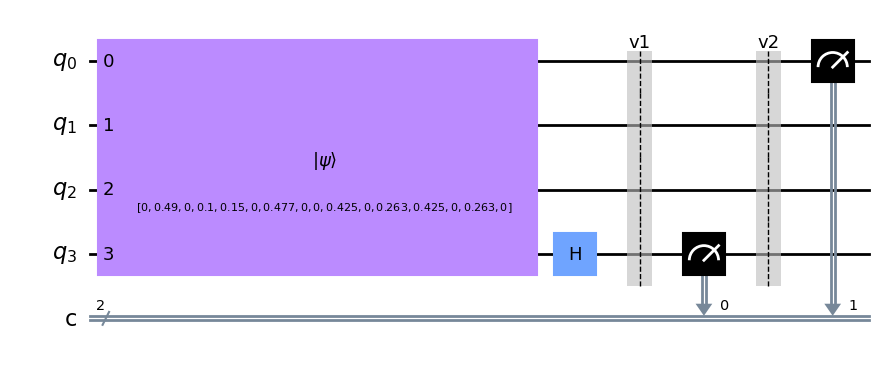

In [36]:
# Import necessary libraries
from qiskit import Aer, QuantumCircuit, transpile, execute
import math

# Initialize the simulator
simulator = Aer.get_backend("aer_simulator")

# Create a quantum circuit with 4 qubits and 2 classical bits
circuit = QuantumCircuit(4, 2)

# Define the initial state vector with normalized training and query data
initial_state = [
    0, trainingData[0][0]/2, 0, trainingData[0][1]/2,
    trainingData[1][0]/2, 0, trainingData[1][1]/2, 0,
    0, queryData[0]/2, 0, queryData[1]/2,
    queryData[0]/2, 0, queryData[1]/2, 0
]

# Initialize the quantum circuit with the initial state
circuit.initialize(initial_state, range(4))

# Apply a Hadamard gate to the 4th qubit
circuit.h(3)

# Save the state vector after Hadamard gate
circuit.save_statevector(label='v1')

# Measure the 4th qubit
circuit.measure(3, 0)

# Save the state vector after measuring the 4th qubit
circuit.save_statevector(label='v2')

# Measure the 1st qubit
circuit.measure(0, 1)

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator 10000 times
numerator = 0
denominator = 0
for _ in range(10000):
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts(compiled_circuit)
    if "00" in counts or "10" in counts:
        stateAfterMeasuringQ3 = result.data(0)['v2']
        denominator += 1
        if "10" in counts:
            numerator += 1

# Print the quantum probabilities
print("Quantum Machine Learning:")
print("P(1) =", numerator/denominator, "   P(0) =", (denominator-numerator)/denominator)
print("")
print("Intermediate State Vectors:")
print("After Hadamard", result.data(0)['v1'])
print("After Measuring Qubit 3", stateAfterMeasuringQ3)

# Draw the circuit
circuit.draw(output="mpl")
